In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
matplotlib.rcParams['figure.figsize']=(20,10)

In [3]:
df1=pd.read_csv("C:/Users/Navneeth ch/Downloads/bengaluru_house_prices.csv")

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
#Data cleaning by dropping the unncessary columns
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
#Handling the null values 
df2.isnull().sum()
#Aggregate of all the num values in sum

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3=df2.dropna()

In [11]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [12]:
#There are some inconsistencies in sizes like 4bhk and 4 bedroom are same so we need to normalize them
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['BHK']=df3['size'].apply(lambda x: x.split(' ')[0])

C:\Users\Navneeth ch\AppData\Local\Temp\ipykernel_32756\2357969482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x: x.split(' ')[0])


In [14]:
df3.head()
df3.drop(['BHK'],axis='columns')

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [15]:
import nltk
from nltk import word_tokenize

In [16]:
nltk.download('punkt',download_dir='D:/nltk_data')

[nltk_data] Downloading package punkt to D:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Navneeth
[nltk_data]     ch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
df3['BHK'] = df3['size'].apply(lambda x: word_tokenize(x)[0])

C:\Users\Navneeth ch\AppData\Local\Temp\ipykernel_32756\1735518981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: word_tokenize(x)[0])


In [19]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [21]:
#with using nltk and without using nltk we can obtain the consister values of BHK
df3.BHK.unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [22]:
df3['BHK'] = df3['BHK'].astype(int)
df3[df3.BHK > 20]

C:\Users\Navneeth ch\AppData\Local\Temp\ipykernel_32756\3459586492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['BHK'].astype(int)


,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [23]:
#BHK 27 adn 43 have prices around 230 lakh and 660 lakh which realistically impossible therefore it could be an error

In [24]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
def isfloat(x):
    try:
        float(str(x).strip())
        return True
    except (ValueError, TypeError):
        return False

In [26]:
#Finding the data where the sqft is in range rather than in number
df3[~df3['total_sqft'].apply(isfloat)].head(20)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [27]:
#Some are sq meters some are sq yards and some are in Perche and acres.So we need to clean the data to give a uniform dimension


In [28]:
def convert_to_sqft(x):
    try:
        x = str(x).strip().lower()

        # Handle ranges like "2100 - 2850"
        if '-' in x:
            parts = x.split('-')
            if len(parts) == 2 and isfloat(parts[0]) and isfloat(parts[1]):
                return (float(parts[0]) + float(parts[1])) / 2

        # Known unit conversions
        if 'meter' in x:
            val = float(re.findall(r'\d+\.?\d*', x)[0])
            return val * 10.7639

        elif 'yard' in x:
            val = float(re.findall(r'\d+\.?\d*', x)[0])
            return val * 9.0

        elif 'acre' in x:
            val = float(re.findall(r'\d+\.?\d*', x)[0])
            return val * 43560

        elif 'perch' in x:
            val = float(re.findall(r'\d+\.?\d*', x)[0])
            return val * 272.25

        elif isfloat(x):
            return float(x)

    except:
        return None

    return None


In [29]:
import re

df3['total_sqft_cleaned'] = df3['total_sqft'].apply(convert_to_sqft)
df3 = df3[(df3['total_sqft_cleaned'].notnull()) & (df3['total_sqft_cleaned'] <= 30000)]


C:\Users\Navneeth ch\AppData\Local\Temp\ipykernel_32756\3534348868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft_cleaned'] = df3['total_sqft'].apply(convert_to_sqft)


In [30]:
df3

,location,size,total_sqft,bath,price,BHK,total_sqft_cleaned
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5,3453.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4,4689.0


In [31]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [32]:
#Finding the data where the sqft is in range rather than in number
df3[~df3['total_sqft'].apply(isfloat)].head(20)

,location,size,total_sqft,bath,price,BHK,total_sqft_cleaned
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4,2475.000000
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4,5611.500000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2,1073.500000
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2,1242.500000
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2,1277.500000
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1,370.923994
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2,1317.500000
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2,1132.500000
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4,4046.000000
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,59.935,2,1177.500000


In [33]:
df3['total_sqft_cleaned'] = df3['total_sqft'].apply(convert_to_sqft)

C:\Users\Navneeth ch\AppData\Local\Temp\ipykernel_32756\4011323581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft_cleaned'] = df3['total_sqft'].apply(convert_to_sqft)


In [34]:
df3

,location,size,total_sqft,bath,price,BHK,total_sqft_cleaned
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5,3453.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4,4689.0


In [35]:
df3[['total_sqft', 'total_sqft_cleaned']].head(20)


,total_sqft,total_sqft_cleaned
0,1056,1056.0
1,2600,2600.0
2,1440,1440.0
3,1521,1521.0
4,1200,1200.0
5,1170,1170.0
6,2732,2732.0
7,3300,3300.0
8,1310,1310.0
9,1020,1020.0


In [36]:
df3.isnull().sum()


location              0
size                  0
total_sqft            0
bath                  0
price                 0
BHK                   0
total_sqft_cleaned    0
dtype: int64

In [37]:
#No null values and no ranges 

In [38]:
df3['total_sqft_cleaned'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [39]:
df4=df3.copy()
#Deep copy of df3

In [40]:
df4

,location,size,total_sqft,bath,price,BHK,total_sqft_cleaned
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5,3453.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4,4689.0


In [41]:
df4.drop(['total_sqft'],axis='columns')

,location,size,bath,price,BHK,total_sqft_cleaned
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,2.0,51.00,2,1200.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0
13316,Richards Town,4 BHK,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0


In [42]:
df4.drop(['size'],axis=1,inplace=True)

In [43]:
df4

,location,total_sqft,bath,price,BHK,total_sqft_cleaned
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0
2,Uttarahalli,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0
4,Kothanur,1200,2.0,51.00,2,1200.0
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5,3453.0
13316,Richards Town,3600,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4689,4.0,488.00,4,4689.0


In [44]:
df4.head(20)

,location,total_sqft,bath,price,BHK,total_sqft_cleaned
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0
2,Uttarahalli,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0
4,Kothanur,1200,2.0,51.00,2,1200.0
5,Whitefield,1170,2.0,38.00,2,1170.0
6,Old Airport Road,2732,4.0,204.00,4,2732.0
7,Rajaji Nagar,3300,4.0,600.00,4,3300.0
8,Marathahalli,1310,3.0,63.25,3,1310.0
9,Gandhi Bazar,1020,6.0,370.00,6,1020.0


In [45]:
df3

,location,size,total_sqft,bath,price,BHK,total_sqft_cleaned
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5,3453.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4,4689.0


In [46]:
#Feature Engineering and Dimensionality Reduction Techniques

In [47]:
df5=df4.copy()
df5

,location,total_sqft,bath,price,BHK,total_sqft_cleaned
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0
2,Uttarahalli,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0
4,Kothanur,1200,2.0,51.00,2,1200.0
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5,3453.0
13316,Richards Town,3600,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4689,4.0,488.00,4,4689.0


In [48]:
df5['Price_per_sqft']=df4['price']*100000/df4['total_sqft_cleaned']

In [49]:
df5

,location,total_sqft,bath,price,BHK,total_sqft_cleaned,Price_per_sqft
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,1200,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5,3453.0,6689.834926
13316,Richards Town,3600,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4689,4.0,488.00,4,4689.0,10407.336319


In [50]:
len(df5['location'].unique())

1299

In [51]:
#Very high dimensionality Due to 1299 different locations.One hot encoding make 1300 diffrent columns which is not feasible

In [52]:
#Dimensionality reduction is needed
df5.location=df5.location.apply(lambda x: x.strip())

In [53]:
df5.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13226, dtype: object

In [54]:
Location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [55]:
Location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              236
                        ... 
ittamadu                   1
kadubisnahalli             1
kamanahalli main road      1
kanakapura main road       1
kanakapura road            1
Name: location, Length: 1288, dtype: int64

In [56]:
location_lessthan_10=Location_stats[Location_stats<=10]

In [57]:
location_lessthan_10

location
Sadashiva Nagar          10
1st Block Koramangala    10
Thyagaraja Nagar         10
Sector 1 HSR Layout      10
Kalkere                  10
                         ..
ittamadu                  1
kadubisnahalli            1
kamanahalli main road     1
kanakapura main road      1
kanakapura road           1
Name: location, Length: 1048, dtype: int64

In [58]:
df5.location=df5.location.apply(lambda x: 'Other' if x in location_lessthan_10 else x)

In [59]:
len(df5.location.unique())

241

In [60]:
#Now this can be converted into one hot encoding
#Outlier Detection and removal technique.....

In [61]:
df5[df5['total_sqft_cleaned']/df5['BHK']<=300].head()

,location,total_sqft,bath,price,BHK,total_sqft_cleaned,Price_per_sqft
9,Other,1020,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,600,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,1407,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,1350,7.0,85.0,8,1350.0,6296.296296
70,Other,500,3.0,100.0,3,500.0,20000.000000


In [62]:
 df5.rename(columns={'price':'Price (in Lakhs)'},inplace=True)
 df5.rename(columns={'total_sqft_cleaned':'Total_SqFt'},inplace=True)
 df5.rename(columns={'bath':'Bathrooms'},inplace=True)

In [63]:
df5

,location,total_sqft,Bathrooms,Price (in Lakhs),BHK,Total_SqFt,Price_per_sqft
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,1200,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5,3453.0,6689.834926
13316,Other,3600,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4689,4.0,488.00,4,4689.0,10407.336319


In [64]:
df5.shape

(13226, 7)

In [65]:
df6 = df5[~((df5['Total_SqFt'] / df5['BHK']) <= 300)]

In [66]:
df6

,location,total_sqft,Bathrooms,Price (in Lakhs),BHK,Total_SqFt,Price_per_sqft
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,1200,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5,3453.0,6689.834926
13316,Other,3600,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4689,4.0,488.00,4,4689.0,10407.336319


In [67]:
df6.Price_per_sqft.describe()

count     12297.000000
mean       6210.876319
std        4051.541578
min         405.395476
25%        4200.000000
50%        5263.157895
75%        6833.333333
max      176470.588235
Name: Price_per_sqft, dtype: float64

In [68]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.Price_per_sqft)
        st=np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st))&(subdf.Price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outliers(df6)
df7
#Removing extremely low or extremely high price per square feet and giving a normal distribution (1 unit of std deviation from mean) to all prices per sq feet

,location,total_sqft,Bathrooms,Price (in Lakhs),BHK,Total_SqFt,Price_per_sqft
0,1st Block Jayanagar,2850,4.0,428.00,4,2850.0,15017.543860
1,1st Block Jayanagar,1630,3.0,194.00,3,1630.0,11901.840491
2,1st Block Jayanagar,1875,2.0,235.00,3,1875.0,12533.333333
3,1st Block Jayanagar,1200,2.0,130.00,3,1200.0,10833.333333
4,1st Block Jayanagar,1235,2.0,148.00,2,1235.0,11983.805668
...,...,...,...,...,...,...,...
10033,Yeshwanthpur,1676,3.0,92.13,3,1676.0,5497.016706
10034,Yeshwanthpur,2503,3.0,138.00,3,2503.0,5513.383939
10035,Yeshwanthpur,1855,3.0,135.00,3,1855.0,7277.628032
10036,Yeshwanthpur,1876,3.0,160.00,3,1876.0,8528.784648


In [69]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3) ]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.Total_SqFt,bhk2.Price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.Total_SqFt,bhk3.Price_per_sqft,marker='*',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(location)
    plt.legend()
    plt.grid(True)
    plt.show()

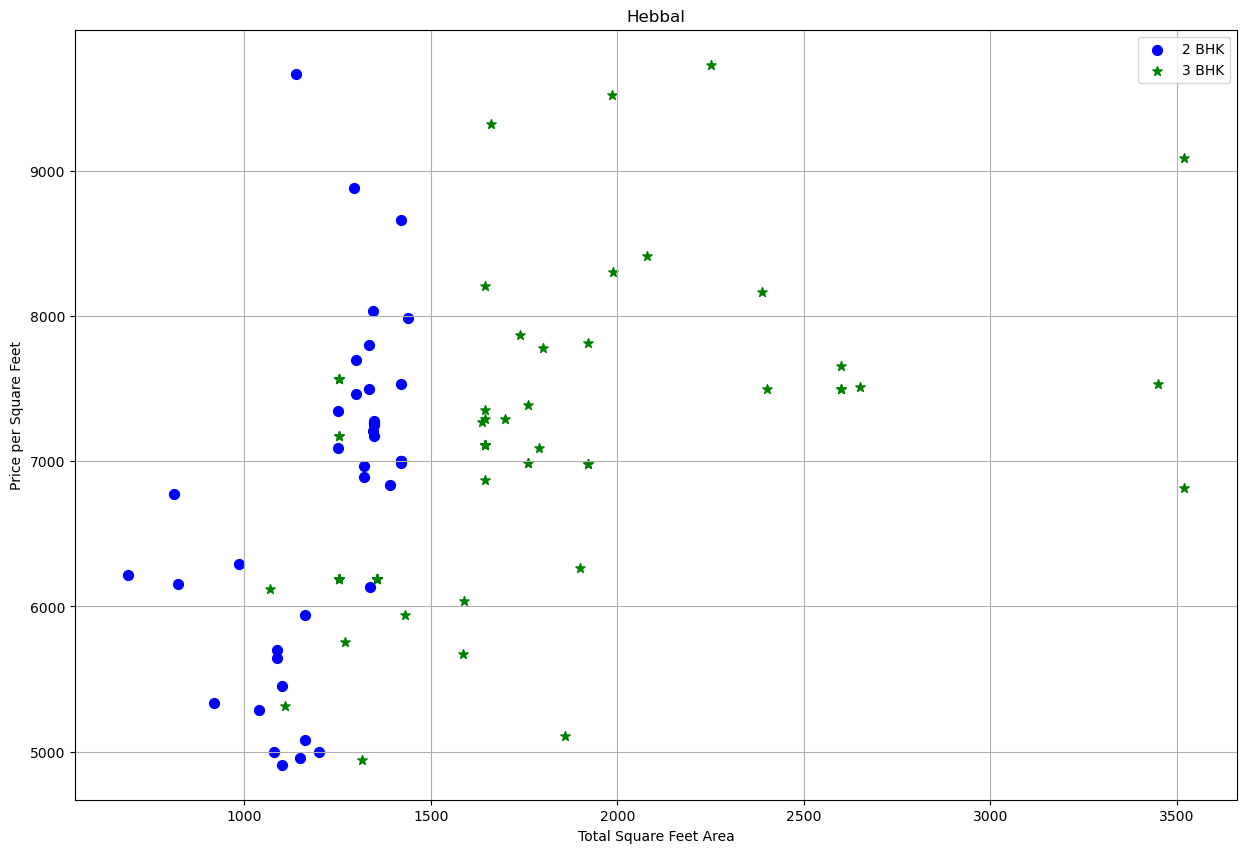

In [70]:
plot_scatter_chart(df7,"Hebbal")

In [71]:
#There are some values (Blue dots) in which the 2 Bhk flats are having much higher rate than 3 bhk flats despite the place and sq feet are being same
"""
So this is considered as an outlier
As there are some exceptional cases 
"""

'\nSo this is considered as an outlier\nAs there are some exceptional cases \n'

In [72]:
'''
Now as we have to make sure that 2BHK prices should be lesser than 3 BHK given the fact that total sq feet and location are same,
We need to use mean and std deviation for a specific flat price
'''
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.Price_per_sqft),
                'std':np.std(bhk_df.Price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [73]:
df8=remove_bhk_outliers(df7)

In [74]:
df7.shape


(10038, 7)

In [75]:
df8.shape

(7164, 7)

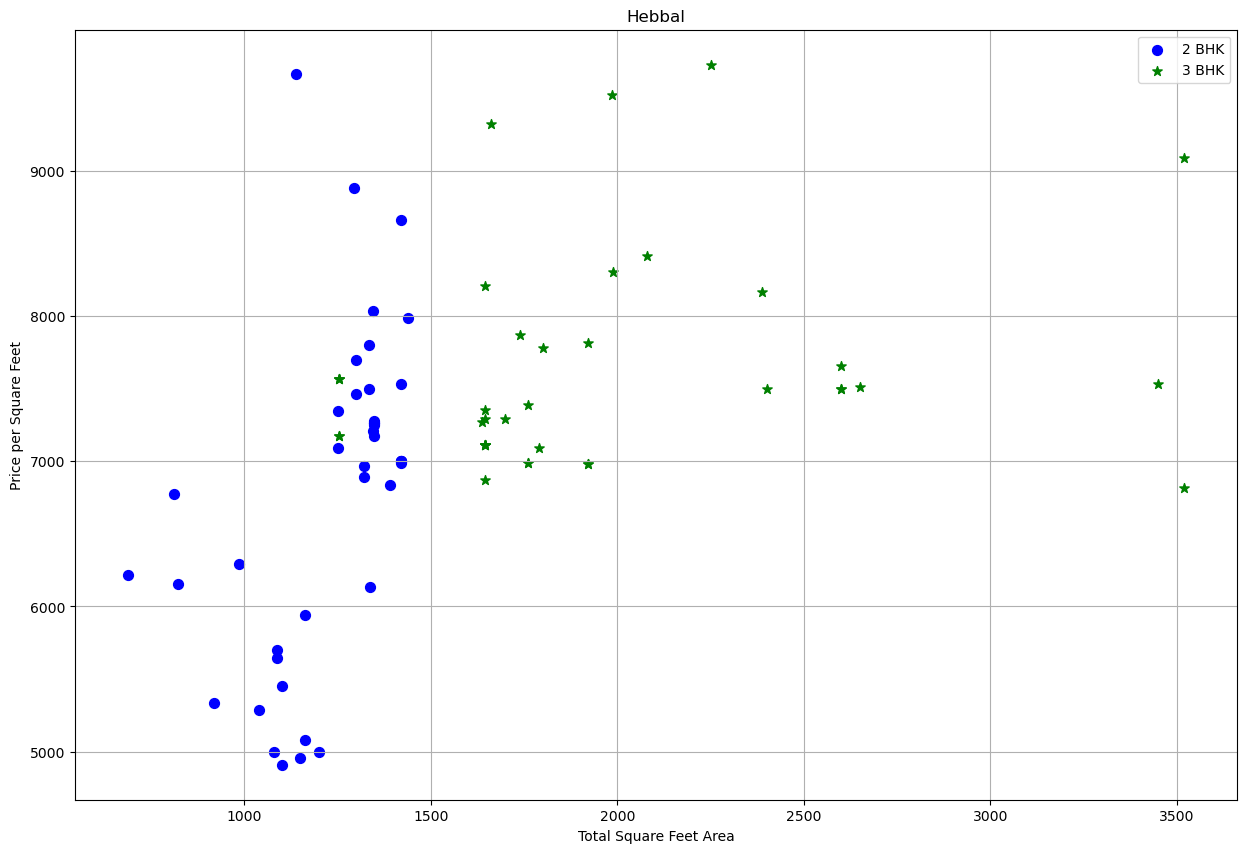

In [76]:
plot_scatter_chart(df8,"Hebbal")

In [77]:
#Now all of them re having 3bhk as greater than 4 bhk for same area

In [78]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.Price_per_sqft,rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

In [79]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.Price_per_sqft,rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

Text(199.22222222222223, 0.5, 'Count')

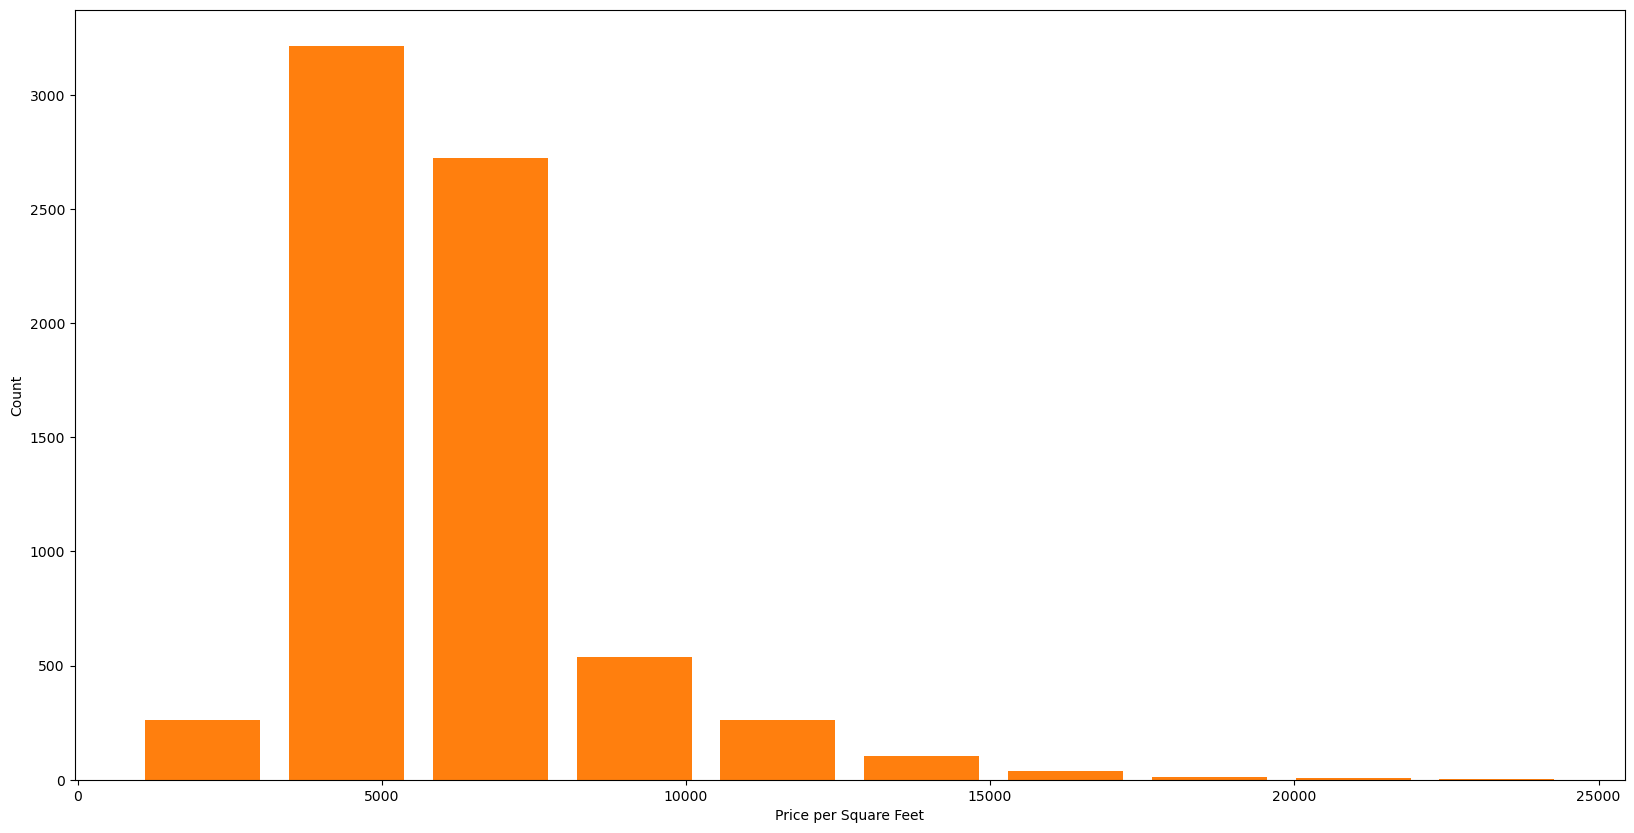

In [80]:
plt.show()

In [81]:
df8

,location,total_sqft,Bathrooms,Price (in Lakhs),BHK,Total_SqFt,Price_per_sqft
0,1st Block Jayanagar,2850,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,1630,3.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,1875,2.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,1200,2.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,1235,2.0,148.0,2,1235.0,11983.805668
...,...,...,...,...,...,...,...
10027,Yeshwanthpur,1195,2.0,100.0,2,1195.0,8368.200837
10028,Yeshwanthpur,1692,3.0,108.0,3,1692.0,6382.978723
10030,Yeshwanthpur,2500,5.0,185.0,6,2500.0,7400.000000
10035,Yeshwanthpur,1855,3.0,135.0,3,1855.0,7277.628032


In [82]:
df8.Bathrooms.unique()

array([ 4.,  3.,  2.,  1.,  8.,  5.,  6.,  7.,  9., 12., 16., 13.])

In [83]:
#Some are having 13 bathrooms which doesn't make sense
df8[df8.Bathrooms>10]

,location,total_sqft,Bathrooms,Price (in Lakhs),BHK,Total_SqFt,Price_per_sqft
5152,Neeladri Nagar,4000,12.0,160.0,10,4000.0,4000.000000
5791,Other,12000,12.0,525.0,10,12000.0,4375.000000
5876,Other,10000,16.0,550.0,16,10000.0,5500.000000
6593,Other,6000,12.0,150.0,11,6000.0,2500.000000
6919,Other,5425,13.0,275.0,13,5425.0,5069.124424


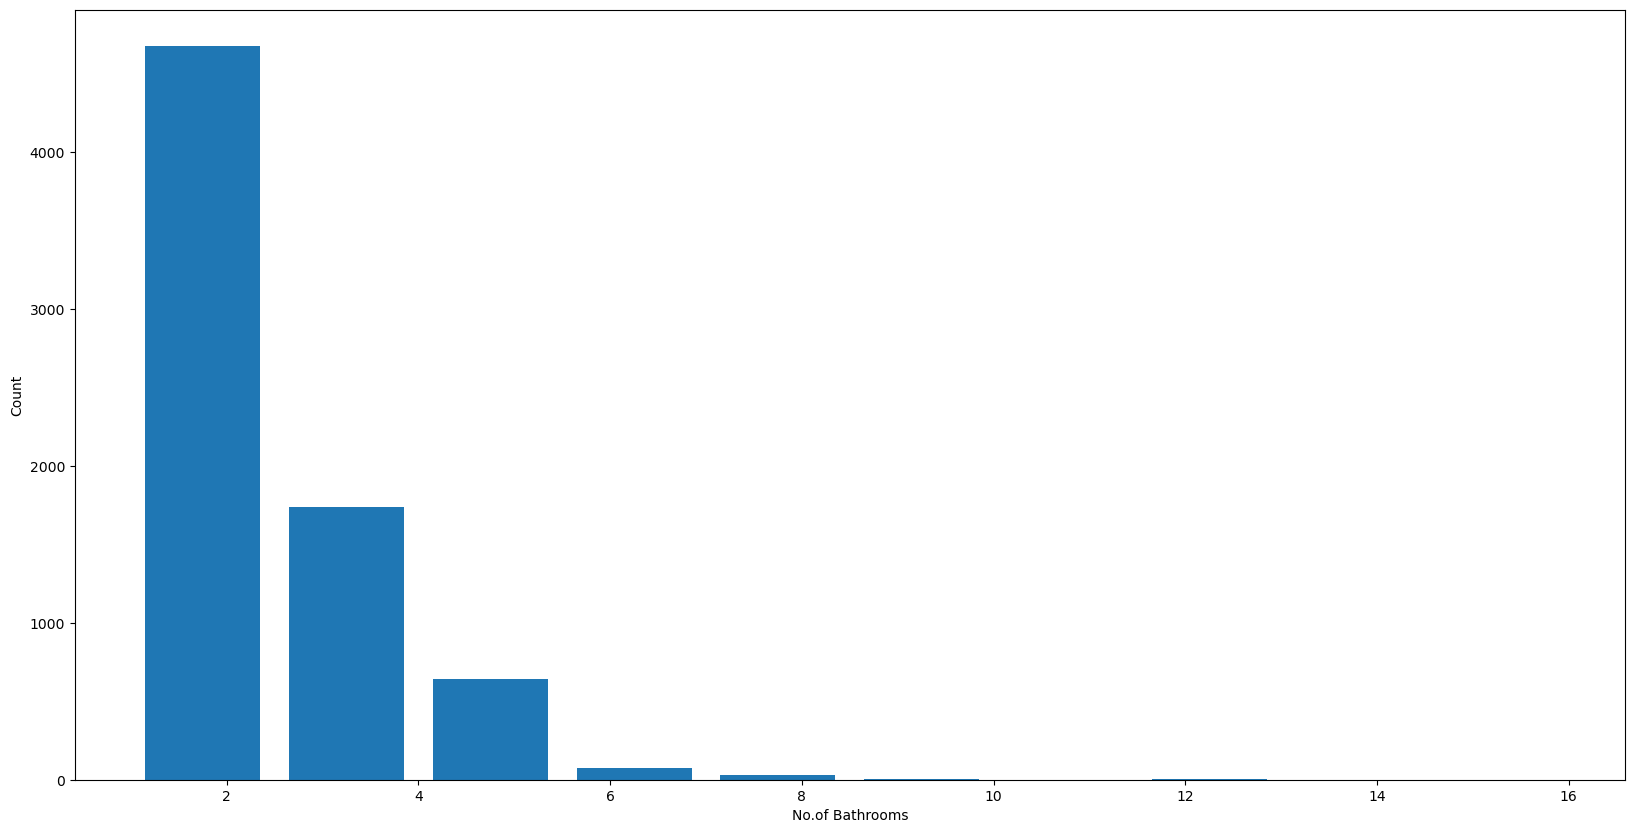

In [84]:
plt.hist(df8.Bathrooms,rwidth=0.8)
plt.xlabel("No.of Bathrooms")
plt.ylabel("Count")
plt.show()

In [85]:
#Consider them as outlier with bathrooms greater than no. bedrooms+2
df8[df8.Bathrooms>df8.BHK+2]

,location,total_sqft,Bathrooms,Price (in Lakhs),BHK,Total_SqFt,Price_per_sqft
1569,Chikkabanavar,2460,7.0,80.0,4,2460.0,3252.032520
5113,Nagasandra,7000,8.0,450.0,4,7000.0,6428.571429
5716,Other,11338,9.0,1000.0,6,11338.0,8819.897689
8831,Thanisandra,1806,6.0,116.0,3,1806.0,6423.034330


In [86]:
df9=df8[df8.Bathrooms<df8.BHK+2]

In [87]:
df9.shape

(7088, 7)

In [88]:
df9

,location,total_sqft,Bathrooms,Price (in Lakhs),BHK,Total_SqFt,Price_per_sqft
0,1st Block Jayanagar,2850,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,1630,3.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,1875,2.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,1200,2.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,1235,2.0,148.0,2,1235.0,11983.805668
...,...,...,...,...,...,...,...
10027,Yeshwanthpur,1195,2.0,100.0,2,1195.0,8368.200837
10028,Yeshwanthpur,1692,3.0,108.0,3,1692.0,6382.978723
10030,Yeshwanthpur,2500,5.0,185.0,6,2500.0,7400.000000
10035,Yeshwanthpur,1855,3.0,135.0,3,1855.0,7277.628032


In [89]:
#Machine learning Model

In [90]:
#One hot encoding for location attribute
dummies=pd.get_dummies(df9.location)
dummies.head(3)
df10=pd.concat([df9,dummies],axis='columns')
df10

,location,total_sqft,Bathrooms,Price (in Lakhs),BHK,Total_SqFt,Price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850,4.0,428.0,4,2850.0,15017.543860,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630,3.0,194.0,3,1630.0,11901.840491,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875,2.0,235.0,3,1875.0,12533.333333,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200,2.0,130.0,3,1200.0,10833.333333,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235,2.0,148.0,2,1235.0,11983.805668,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,Yeshwanthpur,1195,2.0,100.0,2,1195.0,8368.200837,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10028,Yeshwanthpur,1692,3.0,108.0,3,1692.0,6382.978723,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10030,Yeshwanthpur,2500,5.0,185.0,6,2500.0,7400.000000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10035,Yeshwanthpur,1855,3.0,135.0,3,1855.0,7277.628032,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [91]:
#Now we need to avoid dummy vairable trap
#Therefore we drop other column
df11=pd.concat([df9,dummies.drop(['Other'],axis='columns')],axis='columns')

In [92]:
df11

,location,total_sqft,Bathrooms,Price (in Lakhs),BHK,Total_SqFt,Price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850,4.0,428.0,4,2850.0,15017.543860,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630,3.0,194.0,3,1630.0,11901.840491,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875,2.0,235.0,3,1875.0,12533.333333,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200,2.0,130.0,3,1200.0,10833.333333,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235,2.0,148.0,2,1235.0,11983.805668,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,Yeshwanthpur,1195,2.0,100.0,2,1195.0,8368.200837,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10028,Yeshwanthpur,1692,3.0,108.0,3,1692.0,6382.978723,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10030,Yeshwanthpur,2500,5.0,185.0,6,2500.0,7400.000000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10035,Yeshwanthpur,1855,3.0,135.0,3,1855.0,7277.628032,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [93]:
df11.drop(['location'],axis=1,inplace=True)

In [94]:
df11
df11['total_sqft'] = df11['total_sqft'].apply(convert_to_sqft)
df11 = df11[df11['total_sqft'].notnull()]  # remove rows where conversion failed

In [156]:
X=df11.drop(['Price (in Lakhs)'],axis='columns')
X = X.drop(['Total_SqFt', 'Price_per_sqft'], axis=1)

In [157]:
X

,total_sqft,Bathrooms,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,1195.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10028,1692.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10030,2500.0,5.0,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10035,1855.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [158]:
y=df11['Price (in Lakhs)']

In [159]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10027    100.0
10028    108.0
10030    185.0
10035    135.0
10036    160.0
Name: Price (in Lakhs), Length: 7088, dtype: float64

In [166]:
#Scikit learn train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X_train.dtypes

total_sqft             float64
Bathrooms              float64
BHK                      int64
1st Block Jayanagar       bool
1st Phase JP Nagar        bool
                        ...   
Yelachenahalli            bool
Yelahanka                 bool
Yelahanka New Town        bool
Yelenahalli               bool
Yeshwanthpur              bool
Length: 243, dtype: object

In [167]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8525589560753902

In [168]:
#K fold cross validation
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=20)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.85335305, 0.83249927, 0.84880146, 0.74527273, 0.88870493])

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [170]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # 'normalize' is deprecated; use pipeline if needed
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # fixed
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=100)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [171]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.820655,{}
1,lasso,0.708348,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.708364,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [172]:
#Linear Regression model becomes the best fit

In [182]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Build the model with best parameters
decision_model = DecisionTreeRegressor(criterion='squared_error', splitter='random')

# Train the model
decision_model.fit(X_train, y_train)

# Predict on test set
y_pred = decision_model.predict(X_test)

# Evaluate model
score = r2_score(y_test, y_pred)
print("R² Score on Test Set:", score)


R² Score on Test Set: 0.7001975446190357


In [183]:
decision_model.score(X_test,y_test)

0.7001975446190357

In [184]:
clf.score(X_test,y_test)

0.8525589560753902

In [185]:
X

,total_sqft,Bathrooms,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,1195.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10028,1692.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10030,2500.0,5.0,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10035,1855.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [196]:
def predict_price(location, sqft, bath, bhk):    
    loc_index_array = np.where(X.columns == location)[0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if len(loc_index_array) > 0:
        x[loc_index_array[0]] = 1
    x_df = pd.DataFrame([x], columns=X.columns)

    return float(clf.predict(x_df)[0])

In [197]:
predict_price("Indira Nagar",5000,2,2)

436.38663880235947

In [198]:
predict_price("1st Phase JP Nagar",1000,3,3)

104.0475910159247

In [199]:
#Hence the model is predicting with an accuracy of 85 percent and is giving good results
#We need to save the model for the future use


In [200]:
import pickle

In [201]:
with open('RealEstate_Project.pickle','wb') as f:
    pickle.dump(clf,f)

In [203]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("RealEstate_Project.json","w") as f:
    f.write(json.dumps(columns))